<a href="https://colab.research.google.com/github/msommerfe/CAS_Applied_Data_Science/blob/main/CAS_Final_Project/OCR_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import cv2
import os
from sklearn.model_selection import train_test_split
import string

In [2]:
try:
  from google.colab import drive
  import os
  drive.mount('/content/drive')
  data_dir = 'drive/My Drive/colab/keras-ocr'
  os.makedirs(data_dir, exist_ok=True)
except ImportError:
  data_dir = '.'

Mounted at /content/drive


In [83]:
### Converting Chars to nums is better for ML
#Dont use @ in the alphabet. if you need you need to change the fillup char
alphabets = u"ABCDEFGHIJKLMNOPQRSTUVWXYZ-' 0123456789"
alphabets = string.digits + string.ascii_letters + '!?.-() '
max_str_len = 24 # max length of input labels
num_of_characters = len(alphabets) + 1 # +1 for ctc pseudo blank
num_of_timestamps = 64 # max length of predicted labels
batch_size = 128

def label_to_num(label):
    #fills up the label with @
    label = label.ljust(max_str_len, '@')
    label_num = []
    for ch in label:
      label_num.append(alphabets.find(ch) if alphabets.find(ch)!=-1 else -1)
    return np.array(label_num)

def num_to_label(num):
    ret = ""
    for ch in num:
        if ch == -1:  # CTC Blank
            break
        else:
            ret+=alphabets[ch]
    return ret


out = label_to_num("ABCE")
print(out)

num_to_label(out)


[36 37 38 40 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


'ABCE'

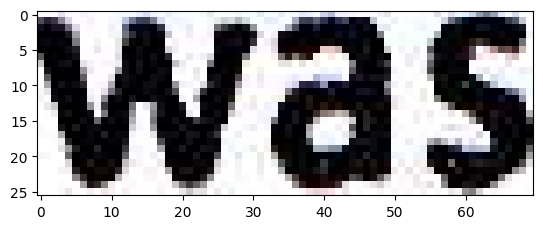

array([[251, 252, 252, ..., 225, 252, 253],
       [ 80,  36,  58, ...,  89, 202, 253],
       [ 20,   2,  23, ...,   9,  25, 251],
       ...,
       [255, 255, 255, ..., 248, 254, 254],
       [255, 255, 255, ..., 254, 253, 252],
       [255, 255, 255, ..., 253, 254, 249]], dtype=uint8)

In [80]:
ImgFolder = '/content/drive/MyDrive/development/datasets/OCR_MNIST_Words/dataset/v011_words_small/'
imgPath = os.path.join(ImgFolder, "11.png")


plt.imshow(cv2.imread(imgPath))
plt.show()
cv2.imread(imgPath,cv2.IMREAD_GRAYSCALE)

(29, 81)


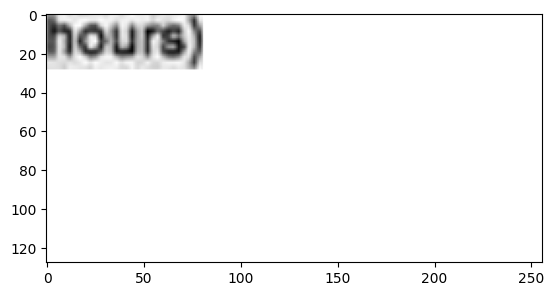

In [6]:
#Scales the width if the image to max_width. Only if the high after scaling to max_width is higher than max_hight, only the hight will be scaled down to max_hight
# Expacts gray scale Images
def preprocess(img):
    max_hight = 128
    max_width = 256

    (h, w) = img.shape


    #Scale all Images down that image width is max_width
    scaleFactor = max_width / w
    if scaleFactor < 1:
      img = cv2.resize(img, None, fx = scaleFactor, fy = scaleFactor)
      (h, w) = img.shape

    #creates blank white image with size max_hight x max_width
    final_img = np.ones([max_hight, max_width])*255 # blank white image

    # if hight is still greater than max_hight, scale only hight down to max_hight
    if h > max_hight:
       img = cv2.resize(img, None, fx = 1, fy = (max_hight/h))


    # fills the blank image with resized imput image
    final_img[:h, :w] = img
    return final_img

image = cv2.imread(imgPath, cv2.IMREAD_GRAYSCALE)
print(image.shape)

plt.imshow(preprocess(image),cmap='gray')

In [ ]:
import json
import numpy as np
from concurrent.futures import ThreadPoolExecutor

ImgFolder = '/content/drive/MyDrive/development/datasets/OCR_MNIST_Words/dataset/v011_words_small/'

#Reading the json {Image_filename, "test on Image"}
with open('/content/drive/MyDrive/development/datasets/OCR_MNIST_Words/v011_labels_small.json') as f:
    data = list(json.load(f).items())
keyVal = np.array(data)
y_all = keyVal[:,1]
x_all_img_path = keyVal[:,0]


def load_image(imgName):
  imgPath = ImgFolder+imgName
  entry = cv2.imread(imgPath,cv2.IMREAD_GRAYSCALE)
  print("loaded:  " + imgName)
  return preprocess(entry)



#Reading all Images and put into a np array
images = []
with ThreadPoolExecutor() as executor:
    results = executor.map(lambda path: load_image(path), x_all_img_path)
    for result in results:
        if result is not None:
            images.append(result)

x_all = np.array(images)

print(x_all.shape)
print(type(x_all))

different


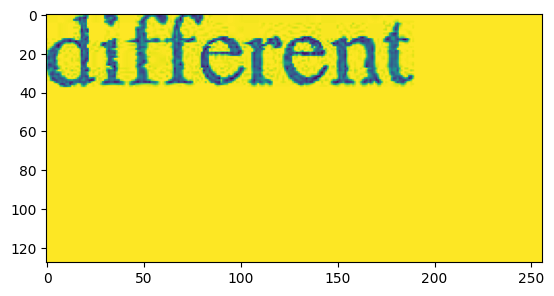

In [16]:
print(y_all[561])
plt.imshow(x_all[561])
plt.show()

In [57]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_all, y_all, test_size=0.2, random_state=42)

In [85]:
# Apply the label_to_num function to each element in y_train using a list comprehension and convert to a NumPy array
new_array = np.array([label_to_num(xi) for xi in y_train])

# Print the new array
print(y_train[2])
print(label_to_num(y_train[2]))
num_to_label(label_to_num(y_train[2]))

(a)
[66 10 67 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


'(a)'

In [ ]:
for xi in y_train:
  print(xi)

In [59]:
print(y_test)

['(1)' 'of' 'the' ... 'the' 'neighborhood' 'His']


In [55]:
# Assuming label_to_num is a function that maps labels to numbers, and y_train is an iterable of labels.
def label_to_num(label):
    # Example function body; replace with your actual function logic
    return {'class1': 0, 'class2': 1, 'class3': 2}.get(label, -1)

# Example y_train data
y_train = ['class1', 'class2', 'class3', 'class2', 'class1']

# Apply the label_to_num function to each element in y_train using a list comprehension and convert to a NumPy array
new_array = np.array([label_to_num(xi) for xi in y_train])

# Print the new array
print(new_array)

[0 1 2 1 0]


In [53]:
new_array = np.array([label_to_num(xi) for xi in y_train])
print(new_array)

TypeError: 'builtin_function_or_method' object is not iterable

In [37]:
vectorized_label_to_num = np.vectorize(label_to_num)
# Apply the function to the 2D array
new_array = vectorized_label_to_num(y_train)
print(new_array)

ValueError: setting an array element with a sequence.

In [33]:
ytry = y_train
ytry1 = map(lambda lbl: label_to_num(lbl), ytry)
ytry = list(ytry)
print(ytry1)

In [22]:
print(y_train[561])
plt.imshow(x_train[561])
plt.show()

IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed